<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Exercise_Fundamentals_2_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import torch

#setting up device agnostic code:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [70]:
weight=0.7
bias=0.3
start=0
end=1
step=0.01

x_data=torch.arange(start,end,step).unsqueeze(dim=1)
y_data=x_data*weight+bias


print(x_data[:10],y_data[:10])

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]]) tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280],
        [0.3350],
        [0.3420],
        [0.3490],
        [0.3560],
        [0.3630]])


In [71]:
x_split=int(len(x_data)*0.8)
x_train,y_train=x_data[:x_split],x_data[:x_split]
x_test,y_test=x_data[x_split:],x_data[x_split:]

print(len(x_train),len(y_train),len(x_test),len(y_test))

80 80 20 20


In [72]:
import matplotlib.pyplot as plt
def plot_prediction(train_data=x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    prediction=None):
  plt.figure(figsize=(10,7))
#plot the training data:
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
#plot the testing data:
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
#now if prediction:
  if prediction is not None:
    plt.scatter(test_data,prediction,c="r",s=4,label="Prediction")
  plt.legend(prop={"size":14})
  plt.show()

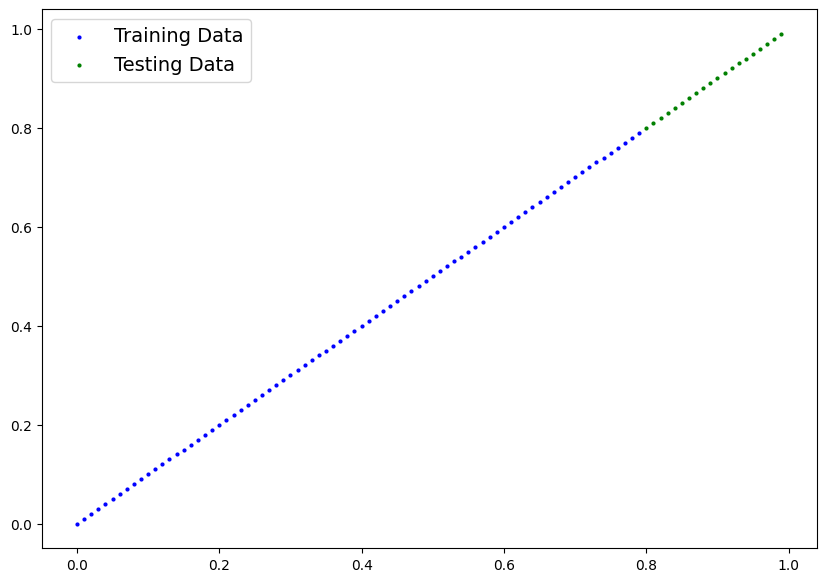

In [73]:
plot_prediction(train_data=x_train,
                train_labels=y_train,
                test_data=x_test,
                test_labels=y_test)

In [74]:
from torch import nn
class linearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x):
    return self.weight*x+self.bias

In [75]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0=linearModel()
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [76]:
with torch.inference_mode():
  y_pred=model_0(x_test)

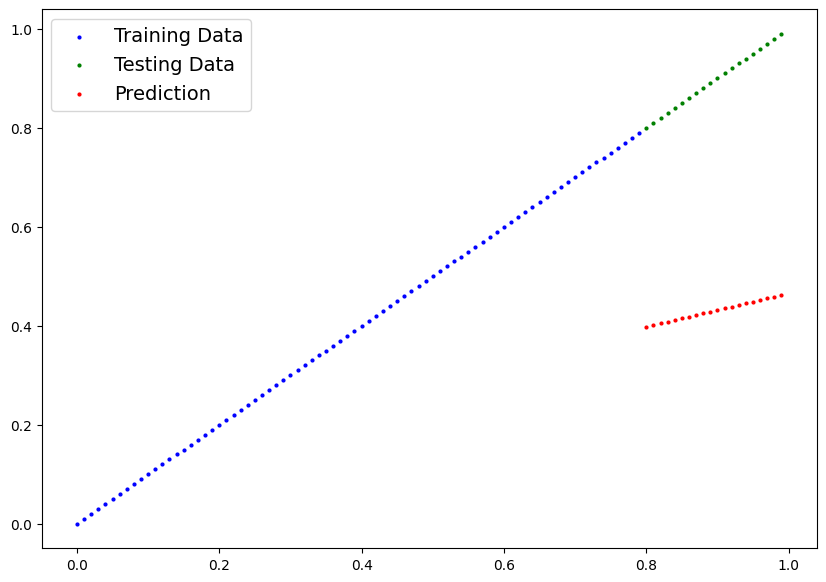

In [77]:
plot_prediction(prediction=y_pred)

In [78]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [79]:
epochs=300
for epoch in range(epochs):
  model_0.train()
  y_pred=model_0(x_train)
  train_loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(x_test)
    test_loss=loss_fn(test_pred,y_test)

  if epoch%10==0:
    print(f"Epoch:{epoch:.2f} | Loss:{train_loss:.2f} |Test loss:{test_loss:.2f}")
    print(model_0.state_dict())


Epoch:0.00 | Loss:0.17 |Test loss:0.46
OrderedDict([('weight', tensor([0.3402])), ('bias', tensor([0.1338]))])
Epoch:10.00 | Loss:0.14 |Test loss:0.39
OrderedDict([('weight', tensor([0.3726])), ('bias', tensor([0.1733]))])
Epoch:20.00 | Loss:0.12 |Test loss:0.34
OrderedDict([('weight', tensor([0.4008])), ('bias', tensor([0.1971]))])
Epoch:30.00 | Loss:0.12 |Test loss:0.31
OrderedDict([('weight', tensor([0.4253])), ('bias', tensor([0.2093]))])
Epoch:40.00 | Loss:0.11 |Test loss:0.28
OrderedDict([('weight', tensor([0.4473])), ('bias', tensor([0.2143]))])
Epoch:50.00 | Loss:0.11 |Test loss:0.26
OrderedDict([('weight', tensor([0.4673])), ('bias', tensor([0.2143]))])
Epoch:60.00 | Loss:0.10 |Test loss:0.25
OrderedDict([('weight', tensor([0.4861])), ('bias', tensor([0.2113]))])
Epoch:70.00 | Loss:0.10 |Test loss:0.24
OrderedDict([('weight', tensor([0.5040])), ('bias', tensor([0.2063]))])
Epoch:80.00 | Loss:0.10 |Test loss:0.23
OrderedDict([('weight', tensor([0.5218])), ('bias', tensor([0.200

In [82]:
with torch.inference_mode():#truns off gradient tracking:
  y_pred=model_0(x_test)
y_pred


tensor([[0.7605],
        [0.7695],
        [0.7784],
        [0.7874],
        [0.7964],
        [0.8053],
        [0.8143],
        [0.8232],
        [0.8322],
        [0.8411],
        [0.8501],
        [0.8590],
        [0.8680],
        [0.8770],
        [0.8859],
        [0.8949],
        [0.9038],
        [0.9128],
        [0.9217],
        [0.9307]])

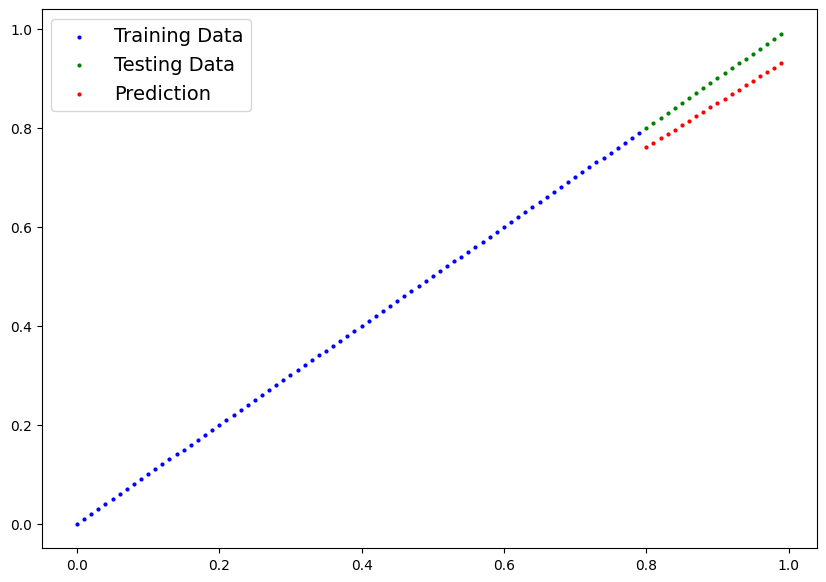

In [83]:
plot_prediction(prediction=y_pred)

In [84]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.8956])), ('bias', tensor([0.0441]))])